In [64]:
import pandas as pd

In [65]:
X_train_df = pd.read_csv("./Training Data/Logistic_X_Train.csv")
Y_train_df = pd.read_csv("./Training Data/Logistic_Y_Train.csv")

In [66]:
X_test_df = pd.read_csv("./Test Cases/Logistic_X_Test.csv")

In [67]:
print(X_train_df[:10])
print(Y_train_df[:10])
print(X_test_df[:10])

         f1        f2        f3
0 -1.239375  0.749101 -0.528515
1 -1.036070  0.801436 -1.283712
2 -0.615579  1.579521 -1.391927
3  1.335978  1.348651  1.433564
4  0.658925  1.300019  0.571603
5  0.656532  0.991440  0.870280
6  1.453978  0.583741  1.277378
7  1.124756  1.116124  1.442579
8 -1.723841 -0.175289 -0.588835
9 -0.794138  1.958963 -0.270497
   label
0      1
1      1
2      1
3      0
4      0
5      0
6      0
7      0
8      1
9      1
         f1        f2        f3
0 -0.767508 -0.261859 -2.514831
1 -1.241653  1.449001 -0.413089
2  1.925270  1.931761  1.342619
3 -1.298255  1.049761 -0.527319
4 -0.964712  0.938088 -1.186328
5 -2.319673 -0.656705  0.017851
6  1.559037  1.113581  1.739047
7 -1.019072  0.876992 -1.052273
8  2.018488  2.298813  1.644282
9  1.387152  1.786612  0.706509


In [68]:
X_train = X_train_df.values
Y_train = Y_train_df.values
X_test = X_test_df.values
print(X_train[:10])
print(Y_train[:10])

[[-1.23937466  0.74910149 -0.52851491]
 [-1.03607028  0.80143631 -1.28371152]
 [-0.61557914  1.57952053 -1.39192706]
 [ 1.33597757  1.34865062  1.43356425]
 [ 0.6589252   1.30001883  0.57160271]
 [ 0.65653223  0.99143964  0.8702798 ]
 [ 1.45397798  0.58374068  1.27737791]
 [ 1.12475633  1.11612393  1.44257928]
 [-1.72384075 -0.17528909 -0.5888352 ]
 [-0.79413813  1.95896313 -0.27049701]]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]


In [69]:
print(X_train.mean(axis=0))

[0.00745338 0.99928635 0.02948714]


In [70]:
print(X_train.std(axis=0))

[1.33391527 1.02368243 1.20935638]


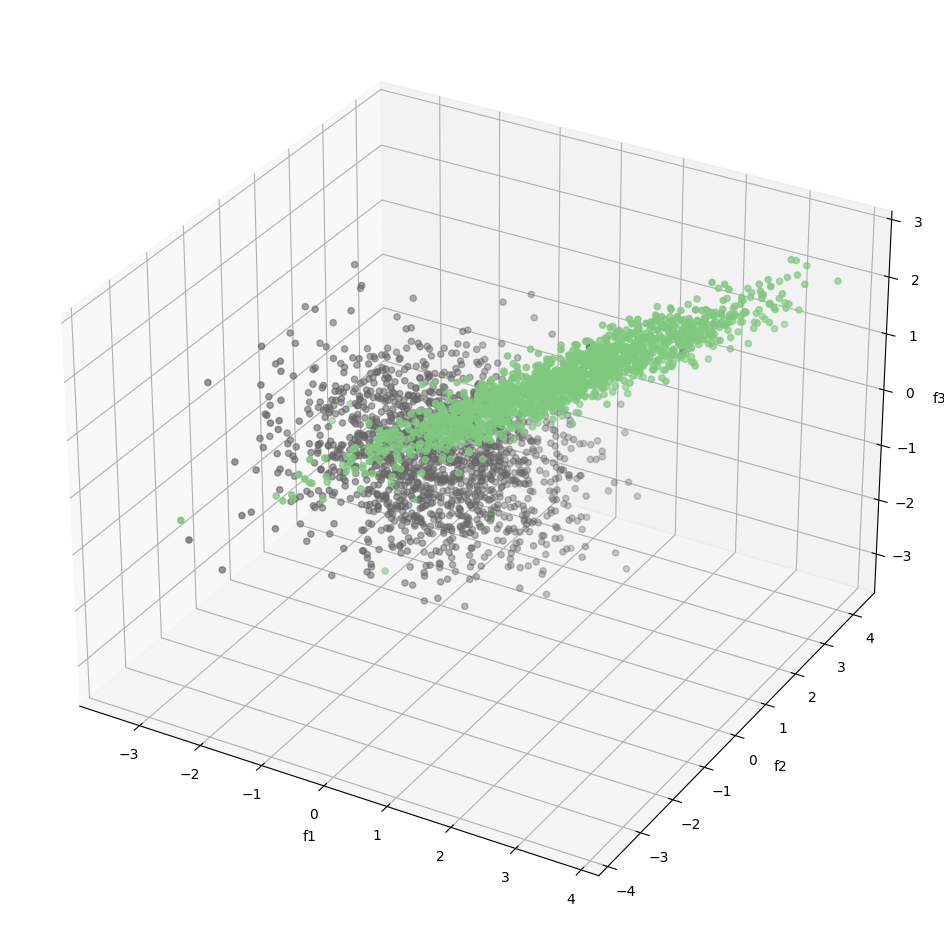

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=Y_train, cmap=plt.cm.Accent)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
plt.show()

In [72]:
import numpy as np
def sigmoid(x): 
    return 1.0/(1.0 + np.exp(-x))
def hypothesis(X, theta): # this is h_theta(x) = g(theta.X) = sigmoid(theta.X) = sigmoid(log_odds) ### theta.X = log_odds
    return sigmoid(np.dot(X, theta))
def error(X, Y, theta):
    m = X.shape[0]
    hypothesis_ = hypothesis(X, theta)
    log_hypothesis = np.log(hypothesis_)

    e = -1 * (np.mean(Y * log_hypothesis + ((1-Y) * np.log(1 - hypothesis_)))) # as we change the candidate line, we will get different loss
    return e
def gradient(X, Y, theta): # Gradient means "Partial derivatives of loss fn w.r.t. theta for all theta values"
    m = X.shape[0]
    hypothesis_ = hypothesis(X, theta)
    return -(np.dot(X.T, (Y - hypothesis_)))/m
def gradient_descent(X, Y, lr = 0.1, max_iter=500):
    n = X.shape[1] # number of features
    theta = np.zeros((n,1))
    error_list = []
    for i in range(max_iter):
        err = error(X, Y, theta)
        error_list.append(err)
        grad = gradient(X, Y, theta)
        # update the candidate line by updating the theta as below
        theta = theta - lr * grad
    return theta, error_list


In [73]:
m = X_train.shape[0]
ones = np.ones((m, 1))
X_train_with_bias = np.hstack((ones, X_train))
print(X_train_with_bias.shape)
print(Y_train.shape)
                              

(3000, 4)
(3000, 1)


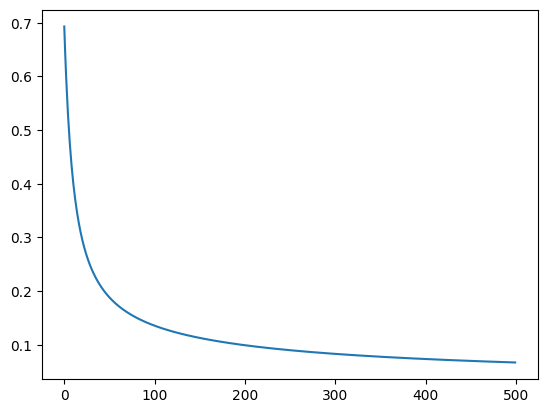

[0.6931471805599454, 0.6444615654252408, 0.6020562558077885, 0.5649971469017772, 0.5324687861432734, 0.5037770713283112, 0.4783399071027952, 0.45567282715541046, 0.4353737083075421, 0.41710860780157405, 0.4005995014146842, 0.38561404846964076, 0.3719572175781617, 0.35946450528914026, 0.3479964692007834, 0.3374343244251836, 0.32767639140825855, 0.3186352222228669, 0.3102352669764369, 0.30241097069174055, 0.2951052141669099, 0.2882680306598618, 0.281855544639677, 0.2758290901028099, 0.27015447474121634, 0.2648013631190803, 0.25974275739592423, 0.2549545583619507, 0.2504151928855859, 0.24610529651279886, 0.2420074420562162, 0.23810590668739354, 0.2343864713888766, 0.2308362477042994, 0.2274435275993594, 0.22419765295662603, 0.22108890180603308, 0.21810838886669498, 0.21524797836492704, 0.21250020741432915, 0.20985821850942626, 0.20731569990497023, 0.20486683283683738, 0.20250624469415057, 0.20022896738115195, 0.19803040021579674, 0.19590627680353828, 0.19385263540221, 0.19186579235961565,

In [74]:
theta, error_list = gradient_descent(X_train_with_bias, Y_train)
plt.plot(error_list)
plt.show()
print(error_list)

In [75]:
m = X_test.shape[0]
ones = np.ones((m, 1))
X_test_with_bias = np.hstack((ones, X_test))
print(X_test_with_bias.shape)

(1000, 4)


In [76]:
def predict(X, theta):
    hypothesis_ = hypothesis(X, theta) # holds the confidence score
    print(hypothesis_[:5,:])
    output = np.zeros(hypothesis_.shape)
    output[hypothesis_ > 0.5] = 1
    output = output.astype('int')
    return output

In [77]:

predict_test_data = predict(X_test_with_bias, theta)
predict_train_data = predict(X_train_with_bias, theta)

[[0.99505493]
 [0.97637183]
 [0.00379635]
 [0.97398354]
 [0.98577523]]
[[0.95980442]
 [0.98820393]
 [0.99112976]
 [0.00509093]
 [0.09950421]]


In [78]:
def accuracy(actual, pred):
    accuracy_ = np.sum(actual == pred) / actual.shape[0]
    return accuracy_ * 100

In [79]:
accuracy(Y_train.astype('int'), predict_train_data)

98.63333333333333

In [80]:
Y_test_df = pd.DataFrame(predict_test_data,  columns=['label'])
Y_test_df

,label
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


In [81]:
Y_test_df.to_csv('./Test Cases/Y_test.csv', index=False)